## Rahul Kumar Raman
## Date: 09/09/20

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data



In [18]:
link='http://bit.ly/w-data'
df=pd.read_csv(link)

### Have an overview on our dataset

In [19]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
df.shape

(25, 2)

In [22]:
print(df.dtypes)


Hours     float64
Scores      int64
dtype: object


### Exploring our dataset

In [23]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


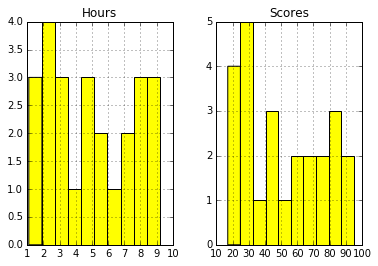

In [39]:
viz=df[['Hours','Scores']]
viz.hist(color='yellow')
plt.show()


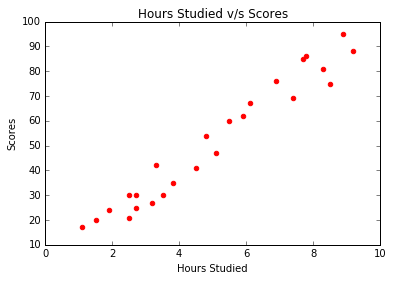

In [36]:
plt.scatter(df.Hours,df.Scores,color="red")
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Hours Studied v/s Scores')
plt.show()

Conclusion of our overview and exploration of our dataset, we have concluded that 'Hours Studied' and 'Scores' are linearly on each other.

### Training and Testing

In [40]:
pdata=np.random.rand(len(df)) < 0.8
train=df[pdata]
test=df[~pdata]

### A look at our training data set

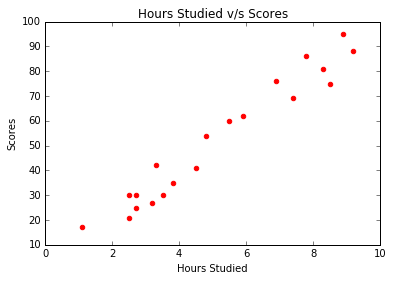

In [42]:
plt.scatter(train.Hours,train.Scores,color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Hours Studied v/s Scores')
plt.show()

### Modeling our training data set

In [54]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['Hours']])
train_y=np.asanyarray(train[['Scores']])
reg.fit(train_x,train_y)
print('Coefficients: ',reg.coef_)
print('Intercept: ',reg.intercept_)

('Coefficients: ', array([[ 9.7479748]]))
('Intercept: ', array([ 1.99792979]))


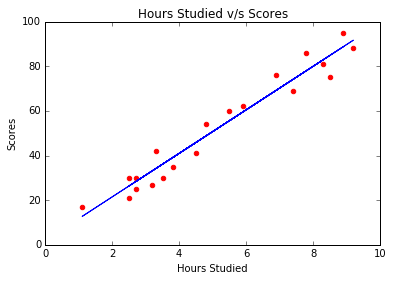

In [62]:
plt.scatter(train.Hours,train.Scores,color='red')
plt.plot(train_x,reg.coef_[0][0]*train_x+reg.intercept_[0],'-b')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Hours Studied v/s Scores')
plt.show()

### Predicting 

In [63]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['Hours']])
test_y=np.asanyarray(test[['Scores']])
test_y_pd=reg.predict(test_x)

In [64]:
print(test_y)

[[47]
 [20]
 [85]
 [24]
 [67]]


In [65]:
print(test_y_pd)

[[ 51.71260126]
 [ 16.61989199]
 [ 77.05733573]
 [ 20.51908191]
 [ 61.46057606]]


### Evaluating how our model performed

In [70]:
print('Mean absoulete error: %.2f' % np.mean(np.absolute(test_y_pd-test_y)))
print('Residual sum of squares(MSE): %.2f' % np.mean((test_y_pd-test_y)**2))
print('R2 score: %.2f' % r2_score(test_y_pd,test_y))

Mean absoulete error: 5.01
Residual sum of squares(MSE): 27.90
R2 score: 0.95
